In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
ticker = 'DABUR.NS'
start_date = '2021-03-31'
end_date = '2024-03-31'
desired_years = ['2022-03-31','2023-03-31','2024-03-31']
dabur = yf.Ticker(ticker)
balance_sheet = dabur.balance_sheet[desired_years].T
income_statement = dabur.financials[desired_years].T
cash_flow = dabur.cashflow[desired_years].T


competitors = ['HINDUNILVR.NS','ITC.NS','NESTLEIND.NS']

In [3]:
cash_flow

,Free Cash Flow,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,End Cash Position,Other Cash Adjustment Outside Changein Cash,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Stock Based Compensation,Provisionand Write Offof Assets,Depreciation And Amortization,Amortization Cash Flow,Depreciation,Pension And Employee Benefit Expense,Gain Loss On Investment Securities,Net Foreign Currency Exchange Gain Loss,Gain Loss On Sale Of PPE,Net Income From Continuing Operations
2022-03-31,14282000000.0,NaN,2918500000.0,500000.0,-3741300000.0,2271700000.0,NaN,1887800000.0,20000000.0,363900000.0,...,400200000.0,43500000.0,2528900000.0,96500000.0,2432400000.0,23000000.0,-174600000.0,-667500000.0,6200000.0,22686800000.0
2023-03-31,9793400000.0,-8859300000.0,9347100000.0,3900000.0,-5090900000.0,975700000.0,14100000.0,2271700000.0,23400000.0,-1333500000.0,...,512300000.0,127100000.0,3109600000.0,333200000.0,2776400000.0,166900000.0,-223900000.0,-1492600000.0,-144100000.0,22186800000.0
2024-03-31,14496100000.0,-6782700000.0,6310900000.0,300000.0,-5638600000.0,-211800000.0,NaN,975700000.0,7000000.0,-1194500000.0,...,504300000.0,231400000.0,3992100000.0,963300000.0,3028800000.0,248300000.0,-579600000.0,-1255100000.0,17800000.0,23587400000.0


In [116]:
balance_sheet['Invested Capital']/1e9

2022-03-31    92.4895
2023-03-31    99.7228
2024-03-31   110.2437
Name: Invested Capital, dtype: object

In [117]:
income_statement.columns

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Rent Expense Supplemental', 'Diluted Average Shares',
       'Basic Average Shares', 'Diluted EPS', 'Basic EPS',
       'Diluted NI Availto Com Stockholders', 'Net Income Common Stockholders',
       'Otherunder Preferred Stock Dividend', 'Net Income',
       'Minority Interests', 'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Non Operating Income Expenses', 'Special Income Charges',
       'Other Special 

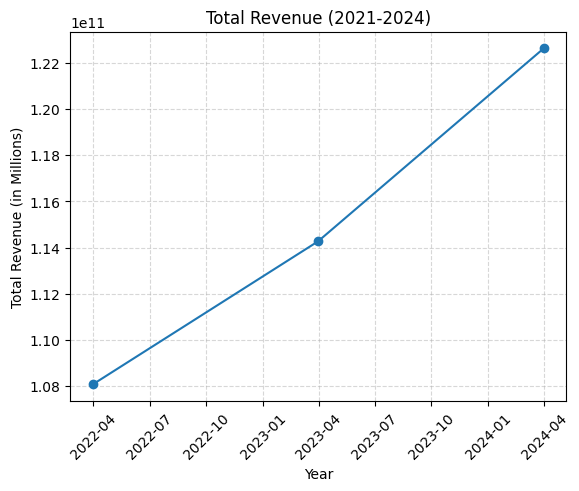

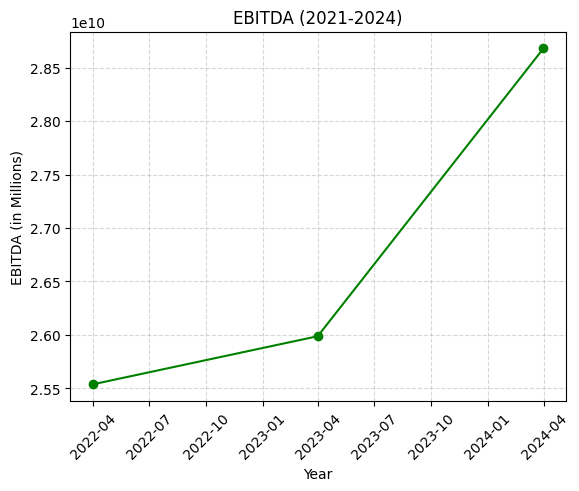

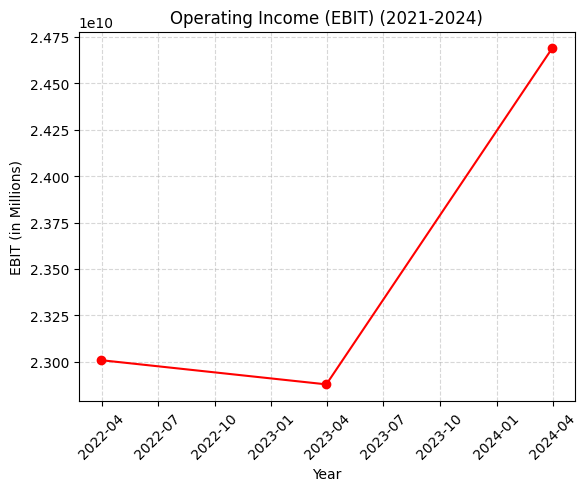

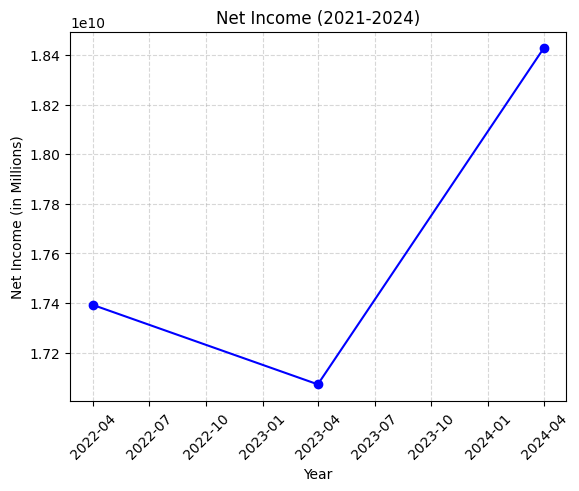

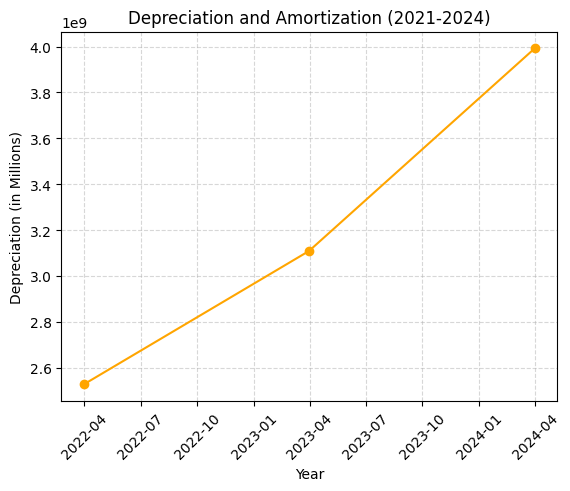

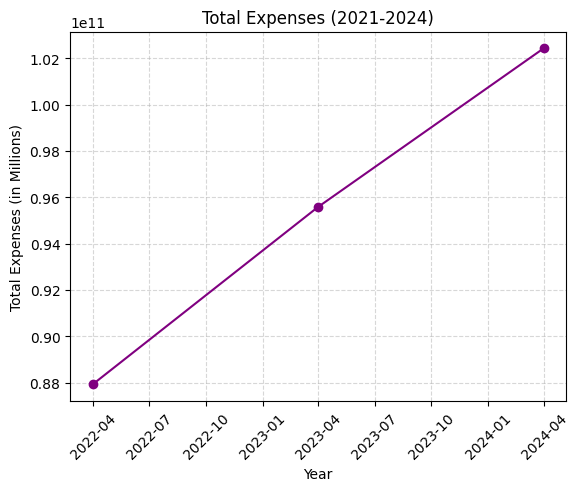

In [5]:
# Plotting Total Revenue
plt.plot(income_statement['Total Revenue'], marker='o')
plt.title("Total Revenue (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Total Revenue (in Millions)")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plotting EBITDA
plt.plot(income_statement['EBITDA'], color='green', marker='o')
plt.title("EBITDA (2021-2024)")
plt.xlabel("Year")
plt.ylabel("EBITDA (in Millions)")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#Plotting EBIT
plt.plot(income_statement['EBIT'], color='red', marker='o')
plt.title("Operating Income (EBIT) (2021-2024)")
plt.xlabel("Year")
plt.ylabel("EBIT (in Millions)")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#Plotting Net Income
plt.plot(income_statement['Net Income'], color='blue', marker='o')
plt.title("Net Income (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Net Income (in Millions)")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#Plotting D&A
plt.plot(income_statement['Depreciation And Amortization In Income Statement'], color='orange', marker='o')
plt.title("Depreciation and Amortization (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Depreciation (in Millions)")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#Plotting total expenses
plt.plot(income_statement['Total Expenses'], color='purple', marker='o')
plt.title("Total Expenses (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Total Expenses (in Millions)")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

1.2 Performing Common Sizing

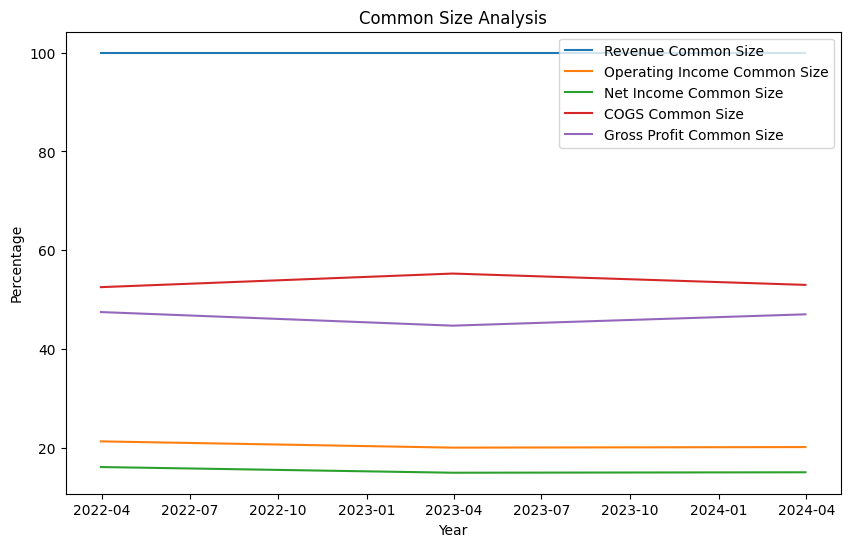

,Revenue Common Size,Operating Income Common Size,Net Income Common Size,COGS Common Size,Gross Profit Common Size
2022-03-31,100.0,21.288338,16.091924,52.52243,47.47757
2023-03-31,100.0,20.022036,14.940257,55.275758,44.724242
2024-03-31,100.0,20.1353,15.027994,52.981532,47.018468


In [6]:
# Creating a single dataframe for better overview
data = pd.DataFrame({
    'Revenue': income_statement['Total Revenue'],
    'Operating Income': income_statement['EBIT'],
    'Net Income': income_statement['Net Income'],
    'Cost Of Revenue': income_statement['Cost Of Revenue'],
    'Gross Profit': income_statement['Gross Profit'],
    'Capital Expenditure': cash_flow['Capital Expenditure'],
    'Accumulated Depreciation': balance_sheet['Accumulated Depreciation'],
    'Interest Expense': income_statement['Interest Expense'],
    })

# Assuming the data columns include 'Revenue', 'Operating Income', 'Net Income', 'Total Assets', etc.
data['Revenue Common Size'] = (data['Revenue'] / data['Revenue']) * 100
data['Operating Income Common Size'] = (data['Operating Income'] / data['Revenue']) * 100
data['Net Income Common Size'] = (data['Net Income'] / data['Revenue']) * 100
data['Cost of Revenue Common Size'] = (data['Cost Of Revenue'] / data['Revenue']) * 100
data['Gross Profit Common Size'] = (data['Gross Profit'] / data['Revenue']) * 100


# Plotting the common sized analysis
plt.figure(figsize=(10, 6))
plt.plot( data['Revenue Common Size'], label='Revenue Common Size')
plt.plot( data['Operating Income Common Size'], label='Operating Income Common Size')
plt.plot( data['Net Income Common Size'], label='Net Income Common Size')
plt.plot( data['Cost of Revenue Common Size'], label='COGS Common Size')
plt.plot( data['Gross Profit Common Size'], label='Gross Profit Common Size')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Common Size Analysis')
plt.legend()
plt.show()

common_size_data = {
    # 'Year': data['Year'],
    'Revenue Common Size': data['Revenue Common Size'],
    'Operating Income Common Size': data['Operating Income Common Size'],
    'Net Income Common Size': data['Net Income Common Size'],
    'COGS Common Size': data['Cost of Revenue Common Size'],
    'Gross Profit Common Size': data['Gross Profit Common Size']
}
common_size_df = pd.DataFrame(common_size_data)

display(common_size_df)

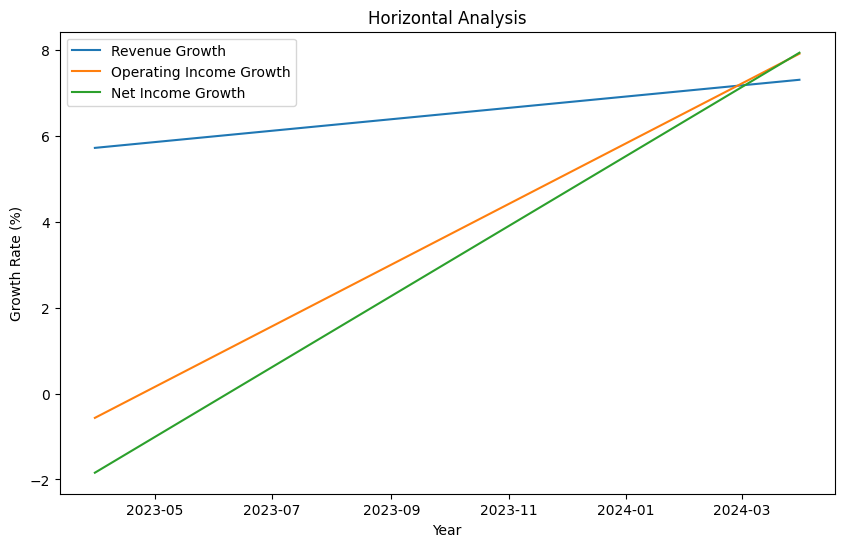

,Revenue,Operating Income,Net Income,Cost Of Revenue,Gross Profit,Capital Expenditure,Accumulated Depreciation,Interest Expense,Revenue Common Size,Operating Income Common Size,Net Income Common Size,Cost of Revenue Common Size,Gross Profit Common Size,Revenue Growth,Operating Income Growth,Net Income Growth,Capital Expenditure Growth,Accumulated Depreciation Growth,Interest Expense Growth
2022-03-31,108080300000.0,23008500000.0,17392200000.0,56766400000.0,51313900000.0,-3741300000.0,-16327600000.0,321700000.0,100.0,21.288338,16.091924,52.52243,47.47757,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,114265100000.0,22878200000.0,17071500000.0,63160900000.0,51104200000.0,-5090900000.0,-18697900000.0,691400000.0,100.0,20.022036,14.940257,55.275758,44.724242,5.722412,-0.566312,-1.843930,36.073023,14.517137,114.920734
2024-03-31,122616500000.0,24689200000.0,18426800000.0,64964100000.0,57652400000.0,-5638600000.0,-21681900000.0,1101800000.0,100.0,20.1353,15.027994,52.981532,47.018468,7.308793,7.915833,7.938963,10.758412,15.959011,59.357825


In [7]:
data['Revenue Growth'] = data['Revenue'].pct_change() * 100
data['Operating Income Growth'] = data['Operating Income'].pct_change() * 100
data['Net Income Growth'] = data['Net Income'].pct_change() * 100
data['Capital Expenditure Growth'] = data['Capital Expenditure'].pct_change() * 100
data['Accumulated Depreciation Growth'] = data['Accumulated Depreciation'].pct_change() * 100
data['Interest Expense Growth'] = data['Interest Expense'].pct_change() * 100

# Plotting the horizontal analysis
plt.figure(figsize=(10, 6))
plt.plot(data['Revenue Growth'], label='Revenue Growth')
plt.plot(data['Operating Income Growth'], label='Operating Income Growth')
plt.plot(data['Net Income Growth'], label='Net Income Growth')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Horizontal Analysis')
plt.legend()
plt.show()

data

In [8]:
# Calculating average growth rates
average_revenue_growth = data['Revenue Growth'].mean() / 100
average_op_income_growth = data['Operating Income Growth'].mean() / 100
average_net_income_growth = data['Net Income Growth'].mean() / 100
average_capex_growth = data['Capital Expenditure Growth'].mean() / 100
average_dep_growth = data['Accumulated Depreciation Growth'].mean() / 100
average_int_exp_growth = data['Interest Expense Growth'].mean() / 100

# Projecting future revenue, operating income, net income and rest of the need parameters
projected_years = [2025, 2026, 2027, 2028, 2029]
projected_revenue = []
projected_op_income = []
projected_net_income = []
projected_capex = []
projected_dep = []
projected_int_exp = []
projected_total_debt = []

# Considering the last value for projection
revenue = data['Revenue'].iloc[-1]
op_income = data['Operating Income'].iloc[-1]
net_income = data['Net Income'].iloc[-1]
capex = data['Capital Expenditure'].iloc[-1]
dep = data['Accumulated Depreciation'].iloc[-1]
int_exp = data['Interest Expense'].iloc[-1]

# Projecting values using the calculated growth rates
for year in projected_years:
    revenue *= (1 + average_revenue_growth)
    op_income *= (1 + average_op_income_growth)
    net_income *= abs(1 + average_net_income_growth)
    capex *= (1 + average_capex_growth)
    dep *= (1 + average_dep_growth)
    int_exp *= (1 + average_int_exp_growth)

    projected_revenue.append(revenue)
    projected_op_income.append(op_income)
    projected_net_income.append(net_income)
    projected_capex.append(capex)
    projected_dep.append(dep)
    projected_int_exp.append(int_exp)

projected_data = {
    'Year': projected_years,
    'Projected Revenue': projected_revenue,
    'Projected Operating Income': projected_op_income,
    'Projected Net Income': projected_net_income,
    'Projected Capital Expenditure': projected_capex,
    'Projected Accumulated Depreciation': projected_dep,
    'Projected Interest Expense': projected_int_exp,
}

# Printing the projected values
projected_values_df = pd.DataFrame(projected_data)

# Displaying the DataFrame as a table
projected_values_df

,Year,Projected Revenue,Projected Operating Income,Projected Net Income,Projected Capital Expenditure,Projected Accumulated Depreciation,Projected Interest Expense
0,2025,1.306057e+11,2.559647e+10,1.898836e+10,-6.958919e+09,-2.498580e+10,2.061901e+09
1,2026,1.391155e+11,2.653708e+10,1.956703e+10,-8.588399e+09,-2.879316e+10,3.858626e+09
2,2027,1.481797e+11,2.751225e+10,2.016334e+10,-1.059943e+10,-3.318068e+10,7.221005e+09
3,2028,1.578345e+11,2.852326e+10,2.077782e+10,-1.308137e+10,-3.823678e+10,1.351334e+10
4,2029,1.681183e+11,2.957142e+10,2.141103e+10,-1.614446e+10,-4.406333e+10,2.528876e+10


In [119]:
# With respect to industry standards, we will consider tax rate as 25 %
tax_rate = 0.25

# Calculation of Future Cash Flows to Firm
# Calculating net working capital for last year
nwc = balance_sheet["Current Assets"] - balance_sheet["Current Liabilities"]
nwc_values = nwc.values
change_in_nwc = []

for i in range(len(nwc_values) - 1):
    change = nwc_values[i + 1] - nwc_values[i]
    change_in_nwc.append(change)
display(change_in_nwc)
growth_nwc = (change_in_nwc[1] - change_in_nwc[0]) / change_in_nwc[0]
projected_delta_nwc = []

for year in projected_years:
    delta_nwc = change_in_nwc[-1] * (1 + growth_nwc)
    projected_delta_nwc.append(delta_nwc)

fcff = []
for i in range(5):
    fcff.append(projected_op_income[i] + projected_dep[i] - projected_capex[i] - projected_delta_nwc[i])

# Calculation of Future Cash Flows to Equity
total_debt = balance_sheet['Total Debt']
total_debt_values = total_debt.values
net_borrowings_list = []

for i in range(len(total_debt_values) - 1):
    net_borrowings = total_debt_values[i + 1] - total_debt_values[i]
    net_borrowings_list.append(net_borrowings)

growth_net_borrowings = (net_borrowings_list[1] - net_borrowings_list[0]) / net_borrowings_list[0]
projected_net_borrowings = []


for year in projected_years:

    net_borrowings = net_borrowings_list[-1] * (1 + growth_net_borrowings)
    projected_net_borrowings.append(net_borrowings)

fcfe = []
for i in range(5):
    fcfe.append(fcff[i] - (projected_int_exp[i] * tax_rate) + projected_net_borrowings[i])

# Create a dictionary with the data of FCFE and FCFF for better representation
fcff_data = {
    'Year': projected_years,
    'FCFF': fcff,
    'FCFE': fcfe
}

fcff_df = pd.DataFrame(fcff_data)

display(fcff_df.style.set_caption('Projected FCFF'))


[-3544700000.0, 11096600000.0]

,Year,FCFF,FCFE
0,2025,42307228899.581215,44338603918.700478
1,2026,41069963126.311180,42652156820.363029
2,2027,39668649450.791649,40410248451.021927
3,2028,38105495433.832558,37274011583.445786
4,2029,36390204363.528893,32614864606.016052


1.2 Cost of Capital

In [22]:
# Downloading stock prices for the security monthly data last 3 years
dabur_df = yf.download(ticker,start='2022-03-31',end='2024-03-31',auto_adjust=False)
dabur_df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,DABUR.NS,DABUR.NS,DABUR.NS,DABUR.NS,DABUR.NS,DABUR.NS
Date,,,,,,
2022-03-31,521.097778,536.200012,539.000000,527.700012,530.900024,2884367
2022-04-01,527.171631,542.450012,545.000000,536.250000,539.000000,1488872
2022-04-04,529.309753,544.650024,546.000000,534.599976,542.900024,2818537
2022-04-05,533.488708,548.950012,553.000000,546.299988,548.000000,2471895
2022-04-06,526.199890,541.450012,548.950012,538.599976,548.950012,1813477
...,...,...,...,...,...,...
2024-03-21,519.031372,523.950012,525.650024,518.500000,522.250000,973386
2024-03-22,515.910950,520.799988,527.349976,519.000000,524.000000,1072318


In [23]:
# Downloading Market index closing prices
nifty_df = yf.download('^NSEI',start='2022-03-31',end='2024-03-31',auto_adjust=False)
nifty_df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2022-03-31,17464.750000,17464.750000,17559.800781,17435.199219,17519.199219,281100
2022-04-01,17670.449219,17670.449219,17703.699219,17422.699219,17436.900391,291800
2022-04-04,18053.400391,18053.400391,18114.650391,17791.400391,17809.099609,345500
2022-04-05,17957.400391,17957.400391,18095.449219,17921.550781,18080.599609,283500
2022-04-06,17807.650391,17807.650391,17901.000000,17779.849609,17842.750000,328800
...,...,...,...,...,...,...
2024-03-21,22011.949219,22011.949219,22080.949219,21941.300781,21989.900391,353200
2024-03-22,22096.750000,22096.750000,22180.699219,21883.300781,21932.199219,388700


In [24]:
# Calculating Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1

Price,Adj Close,Close,High,Low,Open,Volume,Return_NIFTY
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,,
2022-04-01,17670.449219,17670.449219,17703.699219,17422.699219,17436.900391,291800,0.011709
2022-04-04,18053.400391,18053.400391,18114.650391,17791.400391,17809.099609,345500,0.021440
2022-04-05,17957.400391,17957.400391,18095.449219,17921.550781,18080.599609,283500,-0.005332
2022-04-06,17807.650391,17807.650391,17901.000000,17779.849609,17842.750000,328800,-0.008374
2022-04-07,17639.550781,17639.550781,17787.500000,17623.699219,17723.300781,308800,-0.009485
...,...,...,...,...,...,...,...
2024-03-21,22011.949219,22011.949219,22080.949219,21941.300781,21989.900391,353200,0.007884
2024-03-22,22096.750000,22096.750000,22180.699219,21883.300781,21932.199219,388700,0.003845


In [25]:
dabur_df['Return_dabur']= np.log(dabur_df['Adj Close']/dabur_df['Adj Close'].shift(1))
print(dabur_df['Return_dabur'])

Date
2022-03-31         NaN
2022-04-01    0.011588
2022-04-04    0.004048
2022-04-05    0.007864
2022-04-06   -0.013757
                ...   
2024-03-21    0.007183
2024-03-22   -0.006030
2024-03-26    0.000576
2024-03-27    0.001055
2024-03-28    0.002871
Name: Return_dabur, Length: 493, dtype: float64


In [26]:
dabur_df1 = dabur_df.dropna(axis = 0)
dabur_df1.head()

Price,Adj Close,Close,High,Low,Open,Volume,Return_dabur
Ticker,DABUR.NS,DABUR.NS,DABUR.NS,DABUR.NS,DABUR.NS,DABUR.NS,
Date,,,,,,,
2022-04-01,527.171631,542.450012,545.000000,536.250000,539.000000,1488872,0.011588
2022-04-04,529.309753,544.650024,546.000000,534.599976,542.900024,2818537,0.004048
2022-04-05,533.488708,548.950012,553.000000,546.299988,548.000000,2471895,0.007864
2022-04-06,526.199890,541.450012,548.950012,538.599976,548.950012,1813477,-0.013757
2022-04-07,535.043518,550.549988,556.000000,540.500000,540.500000,2078365,0.016667


In [27]:
dabur_df1_returns = dabur_df1['Return_dabur']
dabur_df1_returns.head()

Date
2022-04-01    0.011588
2022-04-04    0.004048
2022-04-05    0.007864
2022-04-06   -0.013757
2022-04-07    0.016667
Name: Return_dabur, dtype: float64

In [28]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

Date
2022-04-01    0.011709
2022-04-04    0.021440
2022-04-05   -0.005332
2022-04-06   -0.008374
2022-04-07   -0.009485
Name: Return_NIFTY, dtype: float64

In [29]:
returns = pd.merge(nifty_df1_returns,dabur_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_dabur
count,492.000000,492.000000
mean,0.000499,-0.000011
std,0.007938,0.012410
min,-0.026891,-0.049073
25%,-0.004197,-0.007046
50%,0.000945,0.000223
75%,0.005496,0.006897
max,0.028482,0.059929


In [31]:
x = returns['Return_NIFTY']
y = returns['Return_dabur']
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_dabur   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     108.4
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           4.56e-23
Time:                        20:49:06   Log-Likelihood:                 1511.1
No. Observations:                 492   AIC:                            -3018.
Df Residuals:                     490   BIC:                            -3010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0003      0.001     -0.676      0.499      -0.001       0.001
Return_NIFTY     0.6654      0.064     10.411      0.000       0.540       0.791
==============================================================================
Omnibus:                       33.537   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.060
Skew:                           0.187   Prob(JB):                     4.64e-25
Kurtosis:                       5.308   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculating Beta by regressing company returns against market returns 
beta_dabur = results.params[1]
print("Beta ", beta_dabur)

Beta  0.6653896618472188


In [48]:
# give me the market returns using nifty_df
nifty_returns_final = nifty_df1['Return_NIFTY'].mean() * 252
nifty_returns_final

0.12579905725212895

In [50]:
risk_free_rate = 0.0658  
market_risk_premium = nifty_returns_final - risk_free_rate
print("Market Risk Premium: {}%".format(market_risk_premium * 100))
cost_of_equity = risk_free_rate + beta_dabur * market_risk_premium
print("Cost of Equity: {}%".format(cost_of_equity * 100))

Market Risk Premium: 5.999905725212895%
Cost of Equity: 10.572275241614602%


Here, we can observe that the Dabur Beta = 0.6654 @ 5% significance (since the p-value is < 0.05).

The risk-free rate (Rf) = 6.58%

Market Returns (Rm) = 12.58%

Market Risk Premium (Rm-Rf) = 5.99%

Cost of equity capital (Rs) = 10.57%

In [62]:
# Interest Coverage Ratio for Dabur = 19.99 (Source - TopStockResearch, SmartInvesting.com)
interest_coverage_ratio = 19.99 
# According to the Credit Default Spread table - Dabur is a AAA rated company
default_spread = 0.45
cost_of_debt = risk_free_rate + default_spread/100
print("Cost of Debt: {}".format(cost_of_debt))

Cost of Debt: 0.0703


In [81]:
percentage_changes = []
for i in range(1, len(fcfe)):
    percentage_change = ((fcfe[i] - fcfe[i-1]) / abs(fcfe[i-1]))
    percentage_changes.append(percentage_change)

# Calculating mean of the percentage changes
terminal_growth_rate = sum(percentage_changes) / len(percentage_changes)

def calculate_market_value_of_equity(fcfe_values, cost_of_equity, terminal_growth_rate):


    # Calculating the present value of each FCFE
    present_value_of_fcfe = sum(fcfe / (1 + cost_of_equity)**t for t, fcfe in enumerate(fcfe_values, start=1))

    # Calculating the terminal value
    terminal_value = fcfe_values[-1] * (1 + terminal_growth_rate) / (cost_of_equity - terminal_growth_rate)

    # Discounting the terminal value to present value
    discounted_terminal_value = terminal_value / (1 + cost_of_equity)**len(fcfe_values)

    # Market value of equity is the sum of present values of FCFE and the discounted terminal value
    market_value_of_equity = present_value_of_fcfe + discounted_terminal_value

    return market_value_of_equity


market_value_of_equity = calculate_market_value_of_equity(fcfe, cost_of_equity, terminal_growth_rate)
print("Market Value of Equity (in Billion INR):", market_value_of_equity/1e9)

Market Value of Equity (in Billion INR): 251.68877260193273


In [90]:
projected_interest_expense = projected_values_df['Projected Interest Expense']

# Discounting projected Interest Expenses to present value
discounted_interest_expense = []
for i, expense in enumerate(projected_interest_expense):
    # print(expense)
    present_value = expense / (1 + cost_of_debt)**(i + 1)  # Discount using cost_of_debt
    discounted_interest_expense.append(present_value)
    # print(present_value)

# Displaying the discounted values
pd.options.display.float_format = '{}'.format

# Displaying the discounted values as a table
discounted_interest_expense_df = pd.DataFrame(discounted_interest_expense, index=projected_years, columns=['Discounted Interest Expense'])
display(discounted_interest_expense_df/1e9,"Discounted Interest Expense (in Billion INR)")

,Discounted Interest Expense
2025,1.9264697540026647
2026,3.3683842013859935
2027,5.889535563469357
2028,10.29770568900595
2029,18.005280945263326


'Discounted Interest Expense (in Billion INR)'

In [82]:
# Finding growth rate in interest expense
net_debt_growth = balance_sheet['Net Debt'].pct_change()

# Finding average of the growth rates
average_net_debt_growth = net_debt_growth.mean()

last_net_debt = balance_sheet['Net Debt'].iloc[-1]

# Projecting Net Debt for the next 5 years
projected_net_debt = []
for year in projected_years:
    last_net_debt *= (1 + average_net_debt_growth)  # Apply growth rate
    projected_net_debt.append(last_net_debt)

market_value_debt = sum(discounted_interest_expense) + projected_net_debt[-1]/(1+cost_of_debt)**5
print("Market Value of Debt (in INR Billion): ", market_value_debt/1e9)


Market Value of Debt (in INR Billion):  57.790603916991124


In [84]:
equity_value = market_value_of_equity
debt_value = market_value_debt

total_value = equity_value + debt_value
equity_weight = equity_value / total_value
debt_weight = debt_value / total_value
# Calculation of weighted average cost of capital
wacc = equity_weight * cost_of_equity + debt_weight * cost_of_debt * (1 - 0.25)  # Assuming 25% tax rate
print("Weighted Average Cost of Capital (WACC): {}%".format(wacc * 100))

Weighted Average Cost of Capital (WACC): 9.582622182072207%


In [137]:
net_income = projected_net_income[-1]
# Finding terminal value of shareholders equity
# Finding growth rate in shareholders equity
net_stockholders_equity_growth = balance_sheet["Stockholders Equity"].pct_change()

# Finding average of the growth rates
average_stockholders_equity_growth = net_stockholders_equity_growth.mean()

last_stockholders_equity = balance_sheet["Stockholders Equity"].iloc[-1]

projected_stockholders_equity = []
for year in projected_years:
    last_stockholders_equity *= (1 + average_stockholders_equity_growth)
    projected_stockholders_equity.append(last_stockholders_equity)

shareholders_equity = projected_stockholders_equity[-1]

# Finding terminal value of net investment
# Finding growth rate in net investment

# net_investment_growth = balance_sheet["Invested Capital"].pct_change()

# # Finding average of the growth rates
# average_investment_growth = net_investment_growth.mean()
# last_investment = balance_sheet["Invested Capital"].iloc[-1]
# # Projecting Net Debt for the next 5 years
# projected_investment = []
# for year in projected_years:
#     last_investment *= (1 + average_investment_growth)
#     projected_investment.append(last_investment)

# net_investment = projected_investment[-1]

# Calculating ROE (Return on Equity)
roe = net_income / shareholders_equity
# Calculating Reinvestment Rate
reinvestment_rate = 0.3507 # source : Screener.in

# Calculating Growth Rate
growth_rate_1 = reinvestment_rate * roe

# Displaying the results


values = {
    "Metric": ["Return on Equity (ROE)", "Reinvestment Rate", "Growth Rate"],
    "Value": [roe, reinvestment_rate, growth_rate_1]
}

df = pd.DataFrame(values)
display(df)

,Metric,Value
0,Return on Equity (ROE),0.14427246103251606
1,Reinvestment Rate,0.3507
2,Growth Rate,0.05059635208410339


In [138]:
def calculate_growth_rate_from_peg(pe_ratio, peg_ratio):

    growth_rate = pe_ratio / peg_ratio
    return growth_rate

# def calculate_terminal_value(fcfe_final_year, cost_of_equity, growth_rate):

#     terminal_value = fcfe_final_year * (1 + growth_rate) / (cost_of_equity - growth_rate)
#     return terminal_value


pe_ratio = 46.65 # Source : Screener.in
peg_ratio = 9.55 # Source : FinBox
fcfe_final_year = fcfe[-1]

# Step 1: Calculate the growth rate from the PEG ratio
growth_rate_2 = calculate_growth_rate_from_peg(pe_ratio, peg_ratio)
# # Step 2: Calculate the terminal value using the growth rate
# terminal_value = calculate_terminal_value(fcfe_final_year, cost_of_equity, growth_rate/100)

print("Estimated Growth Rate: {}%".format(growth_rate_2))
# print("Terminal Value using Relative Valuation:", terminal_value/1e9)

Estimated Growth Rate: 4.884816753926701%


In [ ]:
# percentage_changes = []
# for i in range(1, len(fcff)):
#     percentage_change = ((fcff[i] - fcff[i-1]) / abs(fcff[i-1]))
#     percentage_changes.append(percentage_change)

# # Calculating mean of the percentage changes
# terminal_growth_rate = sum(percentage_changes) / len(percentage_changes)


# using growth rates from peg and pe ratios 
terminal_growth_rate_1 = growth_rate_1
terminal_growth_rate_2 = growth_rate_2/100 
def calculate_market_value_of_capital(fcff_values, wacc, terminal_growth_rate):


    # Calculating the present value of each fcff
    present_value_of_fcff = sum(fcff / (1 + wacc)**t for t, fcff in enumerate(fcff_values, start=1))

    # Calculating the terminal value
    terminal_value = fcff_values[-1] * (1 + terminal_growth_rate) / (wacc - terminal_growth_rate)

    # Discounting the terminal value to present value
    discounted_terminal_value = terminal_value / (1 + wacc)**len(fcff_values)

    # Market value of capital is the sum of present values of fcff and the discounted terminal value
    market_value_of_capital = present_value_of_fcff + discounted_terminal_value

    return market_value_of_capital



market_value_of_capital_1 = calculate_market_value_of_capital(fcff, wacc, terminal_growth_rate_1)
market_value_of_capital_2 = calculate_market_value_of_capital(fcff, wacc, terminal_growth_rate_2)
print("Valuation of Firm using DCF Method (using Reinvestment rates and ROE) in INR Billions:", market_value_of_capital_1/1e9)
print("Valuation of Firm using DCF Method (using Relative Valuation): in INR Billions", market_value_of_capital_2/1e9)

Valuation of Firm using DCF Method (using Reinvestment rates and ROE): 687.3259252622004
Valuation of Firm using DCF Method (using Relative Valuation): 666.5631857601021


Companies we are using for Relative Valuation : 
- Hindustan Unilever Limited (HINDUNILVR.NS)
- Nestle India (NESTLEIND.NS)
- ITC (ITC.NS)

In [154]:
# Define the company's ticker symbol (Dabur India on NSE)
def get_ev_by_ebitda(ticker_symbol):
    # Fetch data from Yahoo Finance
    company = yf.Ticker(ticker_symbol)

    # Get the Enterprise Value (EV) and EBITDA from Yahoo Finance's 'key-statistics' data
    ev = company.info.get("enterpriseValue", None)  # Enterprise Value
    ebitda = company.info.get("ebitda", None)  # EBITDA

    # Calculate EV/EBITDA
    if ev and ebitda:
        ev_ebitda_ratio = ev / ebitda
        print(f"EV/EBITDA for {ticker_symbol}: {ev_ebitda_ratio:.2f}")
    else:
        print("EV or EBITDA data not available for the given company.")
    return ev_ebitda_ratio

ticker_symbols = ['HINDUNILVR.NS', 'ITC.NS', 'NESTLEIND.NS']
# ticker_symbols = ['DABUR.NS']
ev_ebitda_ratios = []
for ticker_symbol in ticker_symbols:
    ev_ebitda_ratios.append(get_ev_by_ebitda(ticker_symbol))
print(ev_ebitda_ratios)
# Calculate the average EV/EBITDA ratio for the competitors
average_ev_ebitda = np.mean(ev_ebitda_ratios)
print(f"Average EV/EBITDA for competitors: {average_ev_ebitda:.2f}")
    

EV/EBITDA for HINDUNILVR.NS: 36.39
EV/EBITDA for ITC.NS: 18.62
EV/EBITDA for NESTLEIND.NS: 49.08
[36.39164787234325, 18.620396378724394, 49.08458093695078]
Average EV/EBITDA for competitors: 34.70


In [156]:
ebitda = income_statement['EBITDA'].iloc[-1]
company_value = average_ev_ebitda*ebitda
print("Company Value using EV/EBITDA method (in INR Billion):", company_value/1e9)

Company Value using EV/EBITDA method (in INR Billion): 995.2088453350375
